In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import random

In [2]:
dt = pd.read_csv("dt2_9385581.csv")

In [3]:
dt.columns

Index(['Unnamed: 0', 'dist', 'date', 'hour', 'lanes', 'max_speed', 'prep',
       'humid', 'temp', 'skyCon', 'prepCon', 'public', 'industrial',
       'cultural', 'agriMarin', 'commercial', 'residental', 'etc', 'weekday',
       'speed'],
      dtype='object')

In [4]:
dt = dt.drop('Unnamed: 0',axis=1)

In [6]:
catagorial_feature_names = ['lanes','skyCon','prepCon','weekday']

for var in catagorial_feature_names :
    dt[var] = dt[var].astype("category")

### EDA continue

In [7]:
dt = pd.get_dummies(dt)

In [9]:
dt.columns

Index(['dist', 'date', 'hour', 'max_speed', 'prep', 'humid', 'temp', 'public',
       'industrial', 'cultural', 'agriMarin', 'commercial', 'residental',
       'etc', 'speed', 'lanes_1.0', 'lanes_2.0', 'lanes_3.0', 'lanes_4.0',
       'lanes_5.0', 'lanes_6.0', 'lanes_7.0', 'skyCon_1.0', 'skyCon_2.0',
       'skyCon_3.0', 'skyCon_4.0', 'prepCon_0.0', 'prepCon_1.0', 'prepCon_2.0',
       'prepCon_3.0', 'weekday_금', 'weekday_목', 'weekday_수', 'weekday_월',
       'weekday_일', 'weekday_토', 'weekday_화'],
      dtype='object')

### divide train and test (skip 1 code)

In [13]:
dt = dt.drop('date',axis=1)

In [14]:
speed = np.array(dt['speed'])

dt2 = dt.drop('speed',axis=1)

dt2_list = list(dt2.columns)

dt2 = np.array(dt2)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(dt2, speed, test_size=0.2)

In [16]:
print('Training dt3 Shape:', X_train.shape)
print('Training speed Shape:', y_train.shape)
print('Testing dt3 Shape:', X_test.shape)
print('Testing speed Shape:', y_test.shape)

Training dt3 Shape: (7508464, 35)
Training speed Shape: (7508464,)
Testing dt3 Shape: (1877117, 35)
Testing speed Shape: (1877117,)


## linearRegression

In [21]:
lm = LinearRegression()
% time model = lm.fit(X_train, y_train)

CPU times: user 51 s, sys: 1min 25s, total: 2min 16s
Wall time: 14.9 s


In [22]:
predictions = lm.predict(X_test)

### RMSLE

In [24]:
def rmsle(y,y_, convertExp = True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v+1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v+1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [25]:
RMSLE = rmsle(y_test, predictions,convertExp = False)

In [26]:
r2_test = r2_score(y_test, predictions)

In [28]:
print("RMSLE : "+str(RMSLE)+"  //  R^2 : "+ str(r2_test))

RMSLE : 0.352792462892  //  R^2 : 0.348647962338


## GRAPH

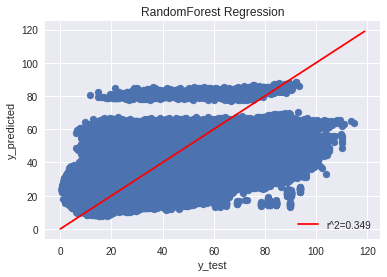

In [29]:
plt.scatter(y_test,predictions)
plt.plot(np.arange(0, 120), np.arange(0,120), label="r^2=" + str(round(r2_test,3)), c="r")
plt.legend(loc="lower right")
plt.title("RandomForest Regression")
plt.xlabel("y_test")
plt.ylabel("y_predicted")
plt.show()